In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

%config InlineBackend.figure_format = "retina"

## Exercise 1

In [2]:
df_rent = pd.read_json('data/train.json')

In [3]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [4]:
len(df_rent)

49352

In [5]:
df_rent.head(2)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low


In [6]:
df_rent.head(2).T

,4,6
bathrooms,1,1
bedrooms,1,2
building_id,8579a0b0d54db803821a35a4a615e97a,b8e75fc949a6cd8225b455648a951712
created,2016-06-16 05:55:27,2016-06-01 05:44:33
description,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...
display_address,145 Borinquen Place,East 44th
features,"[Dining Room, Pre-War, Laundry in Building, Di...","[Doorman, Elevator, Laundry in Building, Dishw..."
latitude,40.7108,40.7513
listing_id,7170325,7092344
longitude,-73.9539,-73.9722


In [112]:
df_rent.isnull().any() #still can have missing values with -1, or "", etc..

bathrooms          False
bedrooms           False
building_id        False
created            False
description        False
display_address    False
features           False
latitude           False
listing_id         False
longitude          False
manager_id         False
photos             False
price              False
street_address     False
interest_level     False
dtype: bool

In [113]:
df_rent["features"].iloc[0]

['Dining Room',
 'Pre-War',
 'Laundry in Building',
 'Dishwasher',
 'Hardwood Floors',
 'Dogs Allowed',
 'Cats Allowed']

In [114]:
df_rent["photos"].iloc[0]

['https://photos.renthop.com/2/7170325_3bb5ac84a5a10227b17b273e79bd77b4.jpg',
 'https://photos.renthop.com/2/7170325_a29a17a771ee6af213966699b05c8ea2.jpg',
 'https://photos.renthop.com/2/7170325_149a898e8760cac1cad56e30cfe98baa.jpg',
 'https://photos.renthop.com/2/7170325_f74a43d781bcc3c5588e61dd47de81ba.jpg',
 'https://photos.renthop.com/2/7170325_e677d9d249ac99abe01aa5454c6e9f59.jpg',
 'https://photos.renthop.com/2/7170325_960ea0e180bf2f15467b68b455db6172.jpg',
 'https://photos.renthop.com/2/7170325_cbc1b8437155dbf7f5d63b3a0b5a45a3.jpg',
 'https://photos.renthop.com/2/7170325_9a9f2adc2ce922e1d5394727efdf64bb.jpg',
 'https://photos.renthop.com/2/7170325_aae2a39d536103eebb282775fab1c315.jpg',
 'https://photos.renthop.com/2/7170325_cd290d0051b9f08e3482195dcbf6b5a6.jpg',
 'https://photos.renthop.com/2/7170325_a2b599da7880eea1edd10c4b04250dc1.jpg',
 'https://photos.renthop.com/2/7170325_6b83fa82d662bcb09733ac3a8a107113.jpg']

In [115]:
df_rent["interest_level"].value_counts()

low       34284
medium    11229
high       3839
Name: interest_level, dtype: int64

In [116]:
df_rent["interest_level"] = df_rent["interest_level"].astype("category")
df_rent["interest_level"] = df_rent["interest_level"].cat.as_ordered() #set as an ordinal var, just wrong order

In [117]:
df_rent["interest_level"]

4         medium
6            low
9         medium
10        medium
15           low
           ...  
124000       low
124002    medium
124004    medium
124008    medium
124009      high
Name: interest_level, Length: 49352, dtype: category
Categories (3, object): ['high' < 'low' < 'medium']

In [118]:
df_rent["interest_level"].cat.codes

4         2
6         1
9         2
10        2
15        1
         ..
124000    1
124002    2
124004    2
124008    2
124009    0
Length: 49352, dtype: int8

In [119]:
#reorder the ordinal variable
df_rent["interest_level"] = df_rent["interest_level"].cat.reorder_categories(["low", "medium", 
                                                                              "high"])
df_rent["interest_level"].cat.codes

4         1
6         0
9         1
10        1
15        0
         ..
124000    0
124002    1
124004    1
124008    1
124009    2
Length: 49352, dtype: int8

In [120]:
#Another way to reorder 
df_rent = pd.read_json('data/train.json')
m = dict(low = 1, medium = 2, high = 3)
df_rent["interest_level"].map(m)

4         2
6         1
9         2
10        2
15        1
         ..
124000    1
124002    2
124004    2
124008    2
124009    3
Name: interest_level, Length: 49352, dtype: int64

In [121]:
df_rent["bedrooms"].unique()

array([1, 2, 3, 0, 4, 5, 6, 8, 7])

In [122]:
df_rent["bathrooms"].unique()

array([ 1. ,  1.5,  2. ,  0. ,  3. ,  4. ,  2.5,  4.5,  3.5,  5. ,  6. ,
        6.5,  5.5,  7. , 10. ])

In [123]:
df_rent["bathrooms"].value_counts()

1.0     39422
2.0      7660
3.0       745
1.5       645
0.0       313
2.5       277
4.0       159
3.5        70
4.5        29
5.0        20
5.5         5
6.0         4
10.0        1
6.5         1
7.0         1
Name: bathrooms, dtype: int64

In [124]:
df_rent["manager_id"].value_counts()

e6472c7237327dd3903b3d6f6a94515a    2533
6e5c10246156ae5bdcd9b487ca99d96a     711
8f5a9c893f6d602f4953fcc0b8e6e9b4     410
62b685cc0d876c3a1a51d63a0d6a8082     402
cb87dadbca78fad02b388dc9e8f25a5b     373
                                    ... 
f4fc6c1a31ed9b02765cf4179f220410       1
2f71e50ee20ce869cafdf0e43a07f893       1
34634f4cd8ed1a15f59118960629cd9c       1
4278ad6855efd8f2aa5da8ead3436d05       1
197500efbe8438b5df8585135b944a9a       1
Name: manager_id, Length: 3481, dtype: int64

## Anomalies

In [125]:
df_rent["price"]

4         2400
6         3800
9         3495
10        3000
15        2795
          ... 
124000    2800
124002    2395
124004    1850
124008    4195
124009    4280
Name: price, Length: 49352, dtype: int64

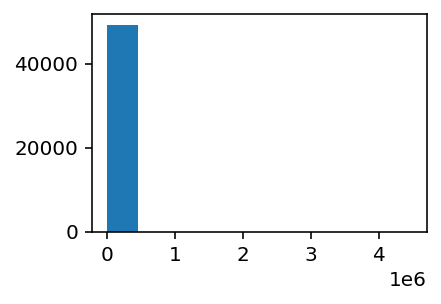

In [126]:
#To show there is a huge outlier
fig, ax = plt.subplots(figsize = (3, 2))
ax.hist(df_rent["price"])
plt.show()

In [127]:
df_rent["price"].max()

4490000

In [128]:
df_rent["price"].sort_values(ascending = False)

32611     4490000
12168     1150000
57803     1070000
55437     1070000
123877     135000
           ...   
113552        695
113599        695
117339        401
87511          45
53144          43
Name: price, Length: 49352, dtype: int64

In [129]:
df_rent["price"] <= 10000

4         True
6         True
9         True
10        True
15        True
          ... 
124000    True
124002    True
124004    True
124008    True
124009    True
Name: price, Length: 49352, dtype: bool

In [130]:
df_rent[df_rent["price"] <= 10000]["price"].sort_values()

53144        43
87511        45
117339      401
113599      695
102756      695
          ...  
119271    10000
55073     10000
6200      10000
3452      10000
102572    10000
Name: price, Length: 48474, dtype: int64

In [131]:
cheapos = df_rent["price"] <= 10000
df_cheapos = df_rent[cheapos]
df_cheapos["price"].sort_values()

53144        43
87511        45
117339      401
113599      695
102756      695
          ...  
119271    10000
55073     10000
6200      10000
3452      10000
102572    10000
Name: price, Length: 48474, dtype: int64

In [132]:
good = (df_rent["price"] <= 10000) & (df_rent["price"] > 100)
df_good = df_rent[good]
df_good["price"].sort_values()

117339      401
102756      695
113552      695
113599      695
85617       695
          ...  
119271    10000
55073     10000
6200      10000
3452      10000
102572    10000
Name: price, Length: 48472, dtype: int64

In [133]:
df_rent[(df_rent["price"] <= 10000) & (df_rent["price"] > 100)]["price"].sort_values()

117339      401
102756      695
113552      695
113599      695
85617       695
          ...  
119271    10000
55073     10000
6200      10000
3452      10000
102572    10000
Name: price, Length: 48472, dtype: int64

In [134]:
df_cheap = df_rent[(df_rent["price"] <= 10000) & (df_rent["price"] > 100)]

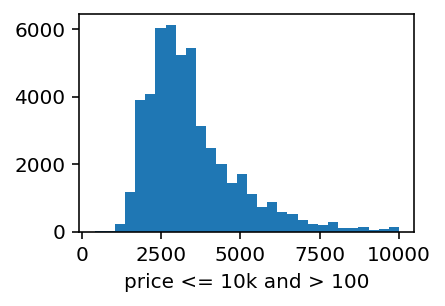

In [135]:
# see that when we take out wrong values, the rent prices are skewed to the right
fig, ax = plt.subplots(figsize = (3, 2))

ax.hist(df_cheap["price"], bins = 30)
ax.set_xlabel("price <= 10k and > 100")

plt.show()

In [136]:
df_rent['photos'].iloc[0]

['https://photos.renthop.com/2/7170325_3bb5ac84a5a10227b17b273e79bd77b4.jpg',
 'https://photos.renthop.com/2/7170325_a29a17a771ee6af213966699b05c8ea2.jpg',
 'https://photos.renthop.com/2/7170325_149a898e8760cac1cad56e30cfe98baa.jpg',
 'https://photos.renthop.com/2/7170325_f74a43d781bcc3c5588e61dd47de81ba.jpg',
 'https://photos.renthop.com/2/7170325_e677d9d249ac99abe01aa5454c6e9f59.jpg',
 'https://photos.renthop.com/2/7170325_960ea0e180bf2f15467b68b455db6172.jpg',
 'https://photos.renthop.com/2/7170325_cbc1b8437155dbf7f5d63b3a0b5a45a3.jpg',
 'https://photos.renthop.com/2/7170325_9a9f2adc2ce922e1d5394727efdf64bb.jpg',
 'https://photos.renthop.com/2/7170325_aae2a39d536103eebb282775fab1c315.jpg',
 'https://photos.renthop.com/2/7170325_cd290d0051b9f08e3482195dcbf6b5a6.jpg',
 'https://photos.renthop.com/2/7170325_a2b599da7880eea1edd10c4b04250dc1.jpg',
 'https://photos.renthop.com/2/7170325_6b83fa82d662bcb09733ac3a8a107113.jpg']

In [137]:
numphotos = []
for ph in df_rent["photos"]: 
    numphotos.append(len(ph))

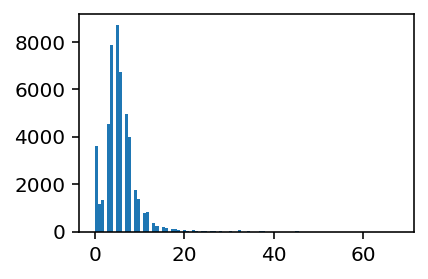

In [138]:
fig, ax = plt.subplots(figsize = (3,2))
ax.hist(numphotos, bins = 100)
plt.show()

In [139]:
numphotos = [len(ph) for ph in df_rent["photos"]]

In [140]:
#use pandas to avoid for loops, faster than a for loop 
#iterating through python is slower than using it with pandas with larger dataset
numphotos = df_rent["photos"].apply(len)

In [141]:
def foo(alist): return len(alist)
df_rent["photos"].apply(foo)

4         12
6          6
9          6
10         5
15         4
          ..
124000     5
124002     5
124004     3
124008     5
124009     8
Name: photos, Length: 49352, dtype: int64

In [142]:
df_rent[numphotos >60]

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
32963,3.0,3,0,2016-06-25 02:54:01,"BACK TO SCHOOL ! FAMILY HOME, three BIG bedroo...",The Somerset 1365 York Avenue,"[Fitness Center, Childrens Playroom, Residents...",40.7674,7214466,-73.9538,9df32cb8dda19d3222d66e69e258616b,[https://photos.renthop.com/2/7214466_4000a418...,7995,The Somerset 1365 York Avenue,low


In [143]:
photos = df_rent.loc[32963, "photos"]

In [144]:
df_rent.loc[32963]

bathrooms                                                          3
bedrooms                                                           3
building_id                                                        0
created                                          2016-06-25 02:54:01
description        BACK TO SCHOOL ! FAMILY HOME, three BIG bedroo...
display_address                        The Somerset 1365 York Avenue
features           [Fitness Center, Childrens Playroom, Residents...
latitude                                                     40.7674
listing_id                                                   7214466
longitude                                                   -73.9538
manager_id                          9df32cb8dda19d3222d66e69e258616b
photos             [https://photos.renthop.com/2/7214466_4000a418...
price                                                           7995
street_address                         The Somerset 1365 York Avenue
interest_level                    

In [145]:
len(set(photos)) == len(photos) # so no duplicates 

True

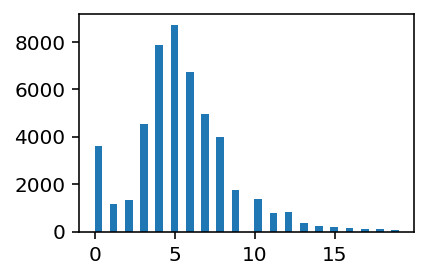

In [146]:
#numphotos is a series so can use the below notation
fig, ax = plt.subplots(figsize = (3, 2))
ax.hist(numphotos[numphotos <20], bins = 40)
plt.show()

In [147]:
numphotos

4         12
6          6
9          6
10         5
15         4
          ..
124000     5
124002     5
124004     3
124008     5
124009     8
Name: photos, Length: 49352, dtype: int64

## Exercise 2

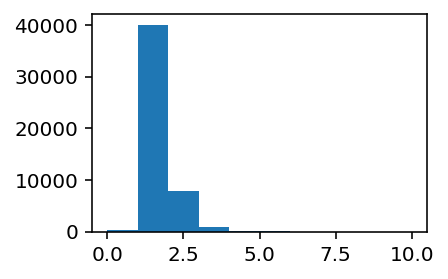

In [148]:
fig, ax = plt.subplots(figsize = (3, 2))
ax.hist(df_rent["bathrooms"])
plt.show()

In [149]:
df_rent["bathrooms"].value_counts()

1.0     39422
2.0      7660
3.0       745
1.5       645
0.0       313
2.5       277
4.0       159
3.5        70
4.5        29
5.0        20
5.5         5
6.0         4
10.0        1
6.5         1
7.0         1
Name: bathrooms, dtype: int64

In [150]:
df_rent[df_rent["bathrooms"] > 6]

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
26937,6.5,7,3be1175591e290053aa6997ac8f4e3bb,2016-06-22 03:15:54,This landmark English stone manor sits majesti...,206 Upper Mountain Avenu,"[Garage, Garden, Doorman]",40.8336,7198431,-74.2160,1d019cccf631394cd7f2aba471a54ca4,[https://photos.renthop.com/2/7198431_70d9d8ff...,14500,206 Upper Mountain Avenu,low
84566,7.0,5,0,2016-04-07 17:06:29,Extraordinary in every way. This single family...,West 9th St- High Class Townhome,[],40.7335,6840943,-73.9974,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/6840943_7f4b82cf...,60000,47th West 9th St,low
104459,10.0,2,424f8014bddc288d26da5fe81d0bea02,2016-04-09 04:34:31,***The building?s well-attended lobby welcomes...,W 52 St.,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7633,6849204,-73.9849,0c71a59cb70215fbf49c9dd93efaa172,[https://photos.renthop.com/2/6849204_1f92b58a...,3600,260 W 52 St.,low


In [151]:
df_rent[df_rent["bathrooms"] == 10]["photos"]

104459    [https://photos.renthop.com/2/6849204_1f92b58a...
Name: photos, dtype: object

## Multivar Relationships

In [152]:
#still have outliers so no relationship, get the ones without the outlier
np.corrcoef(df_rent["bedrooms"], df_rent["price"])

array([[1.        , 0.05178807],
       [0.05178807, 1.        ]])

In [153]:
np.corrcoef(df_rent["bathrooms"], df_rent["price"])

array([[1.        , 0.06966123],
       [0.06966123, 1.        ]])

In [154]:
np.corrcoef(df_cheap["bedrooms"], df_cheap["price"])

array([[1.        , 0.55959092],
       [0.55959092, 1.        ]])

In [155]:
np.corrcoef(df_cheap["bathrooms"], df_cheap["price"])

array([[1.        , 0.63596631],
       [0.63596631, 1.        ]])

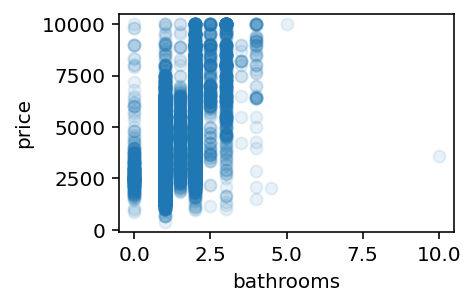

In [156]:
fig, ax = plt.subplots(figsize = (3, 2))

ax.scatter(df_cheap["bathrooms"], df_cheap["price"], alpha = .1)

ax.set_xlabel("bathrooms")
ax.set_ylabel("price")

plt.show()

In [157]:
df_cheap.corr()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.000000,0.508594,-0.006184,-0.002676,0.006311,0.635966
bedrooms,0.508594,1.000000,-0.004462,0.009651,0.006380,0.559591
latitude,-0.006184,-0.004462,1.000000,0.001492,-0.964923,-0.006451
listing_id,-0.002676,0.009651,0.001492,1.000000,-0.000662,0.013594
longitude,0.006311,0.006380,-0.964923,-0.000662,1.000000,-0.005375
price,0.635966,0.559591,-0.006451,0.013594,-0.005375,1.000000


In [158]:
df_rent["interest_level"]

4         medium
6            low
9         medium
10        medium
15           low
           ...  
124000       low
124002    medium
124004    medium
124008    medium
124009      high
Name: interest_level, Length: 49352, dtype: object

In [159]:
low = df_cheap[df_cheap["interest_level"] == 'low']["price"].values
med = df_cheap[df_cheap["interest_level"] == "medium"]["price"].values
hi = df_cheap[df_cheap["interest_level"] == "high"]["price"].values

/Users/surengunturu/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


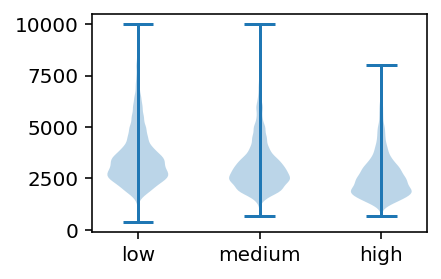

In [160]:
fig, ax = plt.subplots(figsize = (3, 2))

#use .values instead of series for violinplot otherwise keyerror
ax.violinplot([low, med, hi])
ax.set_xticks(range(1, 3 + 1))
ax.set_xticklabels(["low", "medium", "high"])

plt.show()

## Grouping

In [161]:
g = df_cheap.groupby('interest_level')
df_grouped = g.mean()
df_grouped["price"]

interest_level
high      2667.130865
low       3641.405817
medium    3148.513328
Name: price, dtype: float64

In [162]:
df_avg = df_cheap.groupby("bedrooms").mean()
df_avg[["bathrooms", "price"]]

,bathrooms,price
bedrooms,,
0,0.987577,2458.928103
1,1.015403,3049.982025
2,1.239506,3711.253521
3,1.499342,4530.971650
4,1.853283,5567.099942
5,2.301105,7157.121547
6,2.894737,8042.078947
7,3.000000,6923.000000
8,3.500000,8247.500000


## Exercise 3

In [166]:
np.corrcoef(df_cheap["photos"].apply(len), df_cheap["price"])

array([[1.        , 0.15669005],
       [0.15669005, 1.        ]])

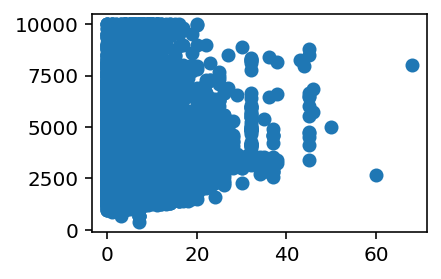

In [167]:
fig, ax = plt.subplots(figsize = (3, 2))
ax.scatter(df_cheap["photos"].apply(len), df_cheap["price"])
plt.show()

/Users/surengunturu/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


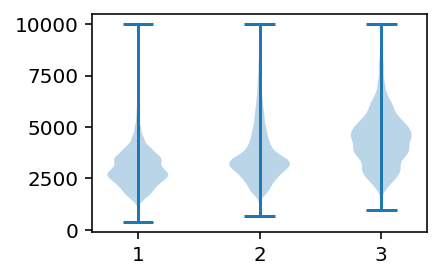

In [168]:
fig, ax = plt.subplots(figsize = (3, 2))
one = df_cheap[df_cheap["bedrooms"] == 1]["price"].values
two = df_cheap[df_cheap["bedrooms"] == 2]["price"].values
three = df_cheap[df_cheap["bedrooms"] == 3]["price"].values
ax.violinplot([one, two, three])
plt.show()

In [91]:
df_cheap.groupby(["bedrooms", "bathrooms"]).mean()["price"]
#can see that maybe 0 bedrooms or 0 bathrooms is not really 0, but 
#    is a sentinel for an unknown value

bedrooms  bathrooms
0         0.0          2840.454545
          1.0          2441.520022
          1.5          3391.111111
          2.0          5514.275862
          4.0          7995.000000
1         0.0          2944.191781
          1.0          3015.346996
          1.5          4605.888158
          2.0          4461.000000
          2.5          4872.500000
          3.0          3702.357143
          4.5          2050.000000
2         0.0          3445.236364
          1.0          3199.951145
          1.5          3996.346154
          2.0          5294.685907
          2.5          7447.352941
          3.0          7614.884615
          10.0         3600.000000
3         0.0          5196.842105
          1.0          3882.997212
          1.5          4100.918269
          2.0          5079.914371
          2.5          6584.288889
          3.0          7466.345528
          3.5          8300.000000
          4.0          6080.000000
4         0.0          5498.333333


In [95]:
df_cheap.groupby(["bedrooms", "bathrooms"]).count()[["price"]] #dataframe type

price
bedrooms bathrooms       
0        0.0          154
         1.0         9265
         1.5            9
         2.0           29
         4.0            1
1        0.0           73
         1.0        15297
         1.5          152
         2.0          205
         2.5            2
         3.0           14
         4.5            1
2        0.0           55
         1.0        10869
         1.5          208
         2.0         3257
         2.5           68
         3.0           26
         10.0           1
3        0.0           19
         1.0         3587
         1.5          208
         2.0         2686
         2.5           90
         3.0          246
         3.5            4
         4.0            3
4        0.0            3
         1.0          365
         1.5           60
         2.0         1148
         2.5           37
         3.0           82
         3.5            8
         4.0           18
5        1.0           10
         1.5            5
         2.0          120
         2.5            4
         3.0           18
         3.5            2
         4.0           22
6        1.0            1
         1.5            1
         2.0           11
         2.5            1
         3.0           14
         4.0            9
         5.0            1
7        3.0            1
8        3.0            1
         4.0            1

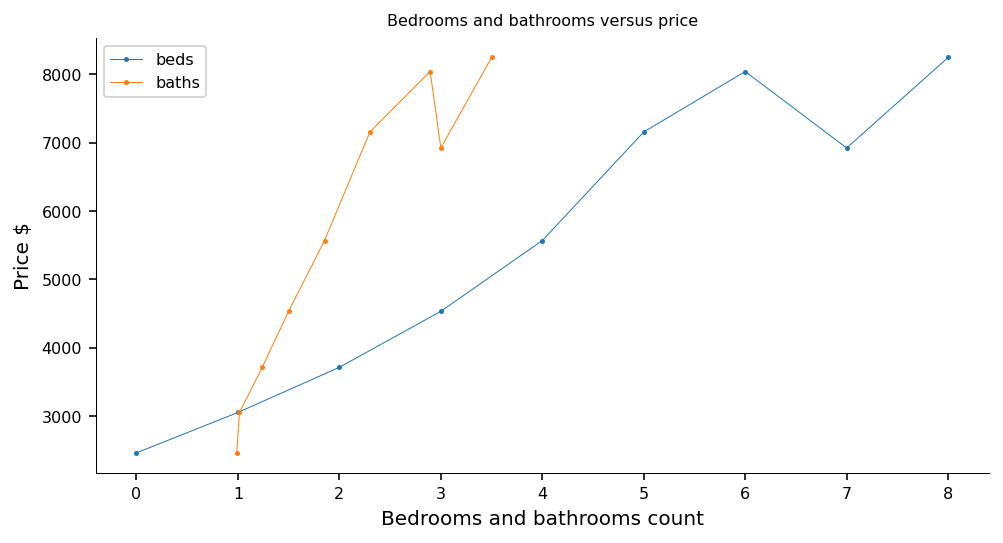

In [97]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(df_avg.index, df_avg['price'], '.-', lw=.5, markersize=3, label="beds")
ax.plot(df_avg['bathrooms'], df_avg['price'], '.-', lw=.5, markersize=3, label="baths")
ax.set_xlabel('Bedrooms and bathrooms count')
ax.set_ylabel('Price \$')
ax.set_xticks(range(0,8+1)) # show all ticks

ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=8)

ax.set_title("Bedrooms and bathrooms versus price", fontsize=8)
plt.legend(fontsize=8) # use "label" parameters from ax.plot()
plt.show()

## Exercise 4

In [173]:
df_avg_interest = df_cheap.groupby("interest_level").mean()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
interest_level,,,,,,
high,1.115224,1.545620,40.748009,7.017830e+06,-73.964633,2667.130865
low,1.195473,1.471468,40.740033,7.026399e+06,-73.952724,3641.405817
medium,1.162209,1.620487,40.745561,7.019087e+06,-73.965012,3148.513328


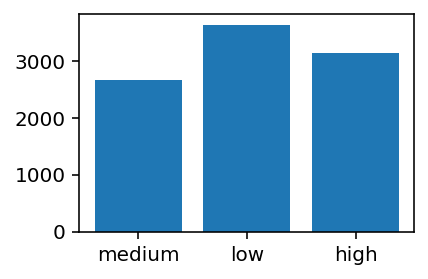

In [174]:
fig, ax = plt.subplots(figsize = (3, 2))
ax.bar(df_cheap["interest_level"].unique(), df_avg_interest["price"])

plt.show()

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df_cheap[["bedrooms", "bathrooms"]]
y = df_cheap["price"]

In [101]:
r = LinearRegression(normalize = True)
r.fit(X, y)
y_pred = r.predict(X)


In [102]:
print(f'y = {r.coef_[0]:.1f}*bedrooms + {r.coef_[1]:.1f}*bathrooms + {r.intercept_:.1f}')
print('R^2', r.score(X,y), "MAE", mean_absolute_error(y, y_pred))

y = 416.7*bedrooms + 1569.0*bathrooms + 966.6
R^2 0.4796732580404881 MAE 751.2601314354682


In [103]:
from sklearn.ensemble import RandomForestRegressor

r = RandomForestRegressor(n_estimators=10) # only this line is different
r.fit(X, y)
y_pred = r.predict(X)
print('R^2', r.score(X,y), "MAE", mean_absolute_error(y, y_pred))

R^2 0.5143717979792253 MAE 729.2466521217486


In [104]:
#what column was a better predictor
from sklearn.inspection import permutation_importance

I = permutation_importance(r, X, y)
I['importances_mean']

array([0.27145162, 0.54454571])

## Analyze Text with Wordcloud

In [175]:
"  hi MSDS 593!   ".strip()

'hi MSDS 593!'

In [176]:
"  hi MSDS 593!".strip().split()

['hi', 'MSDS', '593!']

In [179]:
df_rent["description"] = df_rent["description"].str.strip().str.lower()

text = df_rent["description"].str.cat(sep = "   ")
text[0:100]

'spacious 1 bedroom 1 bathroom in williamsburg!apartment features:- renovated eat in kitchen with dis'

In [180]:
!pip install -q wordcloud
from wordcloud import WordCloud

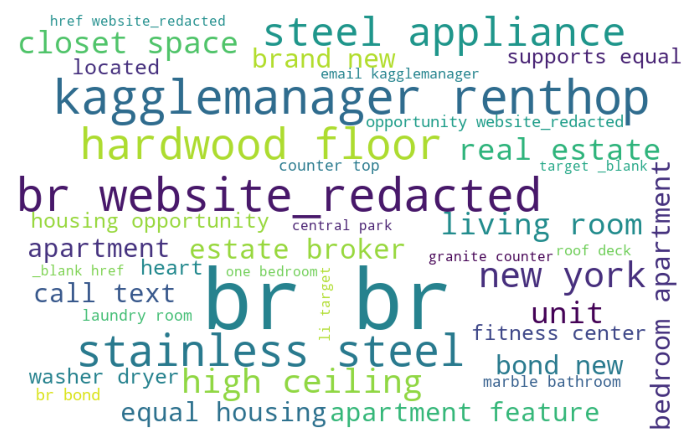

In [181]:

wordcloud = WordCloud(background_color='white', width=800, height=500, max_words=40)
wordcloud.generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

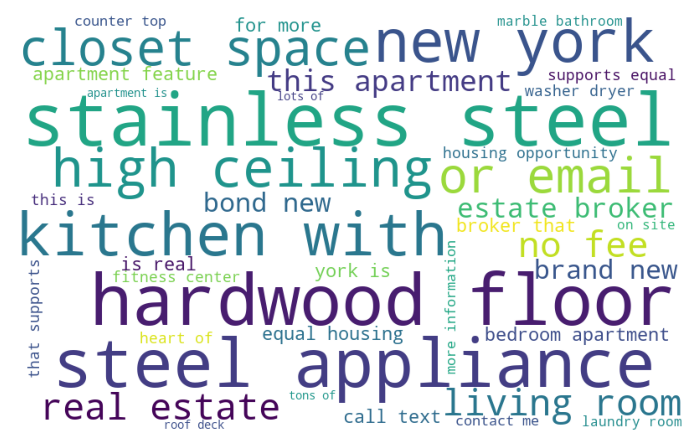

In [182]:
stopwords = ['br','kagglemanager','website_redacted','the','in','to','renthop','com']
wordcloud = WordCloud(background_color='white', stopwords=stopwords,
                      width=800, height=500, max_words=40)
wordcloud.generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Exercise 5

In [188]:
df_rent["features"] = df_rent["features"].str.join(" ")
text = df_rent["features"].str.cat(sep = " ")

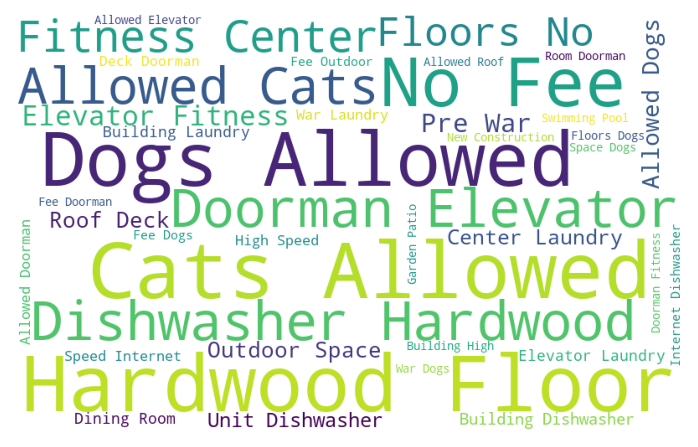

In [189]:
wordcloud = WordCloud(background_color='white', stopwords=stopwords,
                      width=800, height=500, max_words=40)
wordcloud.generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()